In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

import numpy as np
import matplotlib.pyplot as plt

In [80]:
file_name_df = "/content/drive/MyDrive/Colab Notebooks/Proyecto AprendAutom/Dataset Final.xlsx"
df_final = pd.read_excel(file_name_df)
df_final

,AÑO,Num_Mes,Indice general,Cotizacion,Aireacondicionado,Celulares,Microondas,Televisor,Mod Electr Autom
0,2013,1,1.02,4.96,77671,609990,38094,136796,23797
1,2013,2,1.06,5.02,90403,703500,32936,207715,26602
2,2013,3,1.01,5.10,115115,918733,62302,288394,36371
3,2013,4,0.96,5.16,78426,1083534,46865,268295,39229
4,2013,5,1.26,5.26,108772,1293334,63549,320475,48379
...,...,...,...,...,...,...,...,...,...
142,2024,11,2.43,991.00,198554,716903,18428,247424,37837
143,2024,12,2.70,1012.50,216260,633913,17519,189205,17606
144,2025,1,2.21,1033.50,102142,393358,16859,196924,28338
145,2025,2,2.40,1044.25,67686,557773,1140,230022,40067


In [81]:
# matriz de correlacion
df_final.corr()

,AÑO,Num_Mes,Indice general,Cotizacion,Aireacondicionado,Celulares,Microondas,Televisor,Mod Electr Autom
AÑO,1.000000,-0.047529,0.566261,0.700371,-0.157011,-0.416314,-0.317641,-0.242560,-0.345523
Num_Mes,-0.047529,1.000000,-0.029105,-0.014546,0.701434,0.164040,0.193898,0.145156,0.061731
Indice general,0.566261,-0.029105,1.000000,0.436936,-0.098331,-0.261291,-0.168281,-0.270199,-0.142465
Cotizacion,0.700371,-0.014546,0.436936,1.000000,-0.025857,-0.362638,-0.329466,-0.207966,0.240642
Aireacondicionado,-0.157011,0.701434,-0.098331,-0.025857,1.000000,0.444384,0.418425,0.303581,0.264895
Celulares,-0.416314,0.164040,-0.261291,-0.362638,0.444384,1.000000,0.622609,0.671220,0.310099
Microondas,-0.317641,0.193898,-0.168281,-0.329466,0.418425,0.622609,1.000000,0.483072,0.244970
Televisor,-0.242560,0.145156,-0.270199,-0.207966,0.303581,0.671220,0.483072,1.000000,0.225307
Mod Electr Autom,-0.345523,0.061731,-0.142465,0.240642,0.264895,0.310099,0.244970,0.225307,1.000000


# Modelo predictivo producción de Aires Acondicionado (AA)

A partir de de los datos de correlación se toman las variables mas influyentes para desarrollar el modelo de predicción de producción de Aire Acondcionado (AA)

### Modelo Regresión Lineal

In [154]:
# Defino características (X) y variable objetivo (y)
X = df_final[["AÑO",'Num_Mes', 'Cotizacion', 'Indice general']]
y = df_final['Aireacondicionado']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

R² Score: 0.3698447764102728
Mean Absolute Error (MAE): 35461.33104174609


### Modelo Random Forest

In [155]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar el modelo
rf_model = RandomForestRegressor(random_state=42)
# Entrenar el modelo
rf_model.fit(X_train, y_train)
# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)
# Evaluar el modelo
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2_rf}')   # 0.62
print(f'Mean Absolute Error (MAE): {mae_rf}')

R² Score: 0.6245013129125211
Mean Absolute Error (MAE): 35461.33104174609


Dado los valores obtenidos respecto a la precision y errores, en pos de mejorarlos se crean nuevas variables derivadas de las originales:

In [157]:
# Crear nuevas variables
df_final['Sin_Num_Mes'] = np.sin(2 * np.pi * df_final['Num_Mes'] / 12)
df_final['Lag_1'] = df_final['Cotizacion'].shift(1)
df_final['Prom_trim_aa'] = df_final['Aireacondicionado'].rolling(window=3).mean()

scaler = StandardScaler()
df_final[['Cotizacion']] = scaler.fit_transform(df_final[['Cotizacion']])
# Crear una columna de promedio trimestral
df_final['Trimestre'] = ((df_final['Num_Mes'] - 1) // 3) + 1
df_final['Promedio_Trimestral'] = df_final.groupby(['AÑO', 'Trimestre'])['Cotizacion'].transform('mean')

# Redefinir X e y
X = df_final[['AÑO', 'Num_Mes', 'Promedio_Trimestral', "Lag_1", "Indice general", "Prom_trim_aa", "Cotizacion", "Sin_Num_Mes", "Trimestre"]]  # Solo columnas relevantes
y = df_final['Aireacondicionado']


A partir de estas nuevas variables y ajustando los hiperparámetros del del modelo se llega a este nuevo resultado:

In [158]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Inicializar el modelo con los mejores parámetros
rf_model = RandomForestRegressor(n_estimators=185, max_depth=10, min_samples_split=3, random_state=42)
# Ajustar el modelo a los datos de entrenamiento
rf_model.fit(X_train, y_train)
# Hacer predicciones
y_pred_best = rf_model.predict(X_test)
# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
print(f'R² Score (Mejor Modelo): {best_r2}') #0.75
print(f'Mean Absolute Error (MAE): {mae}')

R² Score (Mejor Modelo): 0.7550690889220941
Mean Absolute Error (MAE): 22677.718879343625


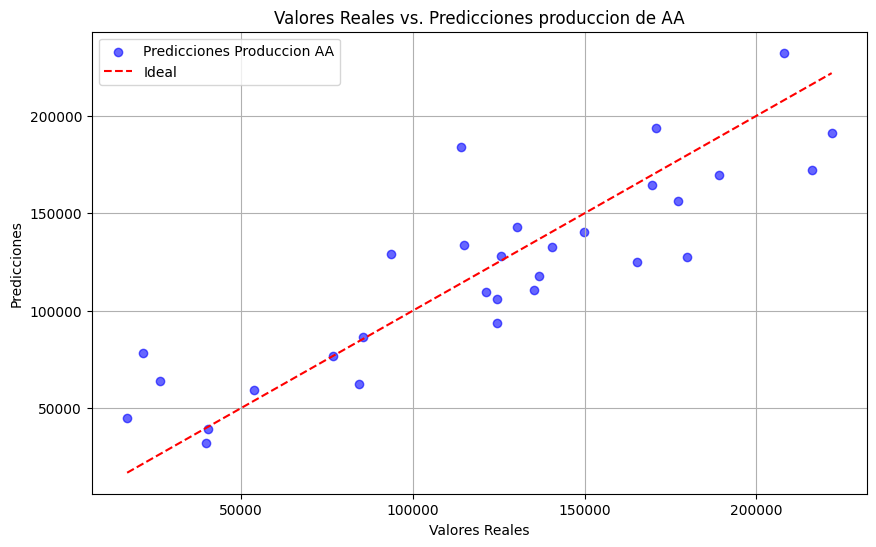

In [127]:
# Gráfico de dispersión de valores reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='blue', label='Predicciones Produccion AA')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones produccion de AA')
plt.legend()
plt.grid()
plt.show()

## Predicciones

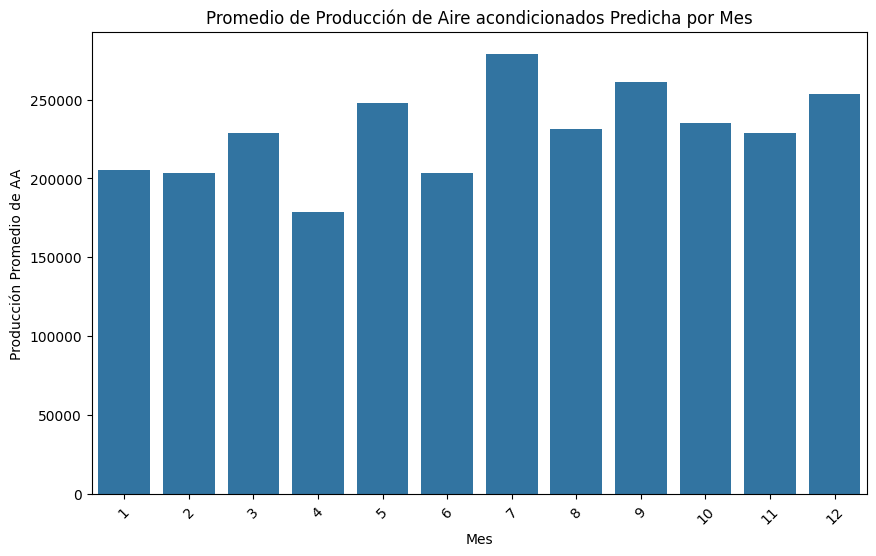

In [128]:
# Análisis de patrones estacionales
df_final['Predicciones'] = np.nan
df_final.iloc[-len(y_test):, df_final.columns.get_loc('Predicciones')] = y_pred_rf

seasonal_avg = df_final.groupby('Num_Mes')['Predicciones'].mean()

# Visualizar patrones estacionales
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values)
plt.title('Promedio de Producción de Aire acondicionados Predicha por Mes')
plt.xlabel('Mes')
plt.ylabel('Producción Promedio de AA')
plt.xticks(rotation=45)
plt.show()

# Modelo predictivo producción de Aires Celulares

### Modelo Regresión Lineal

In [185]:
# Defino características (X) y variable objetivo (y)
X = df_final[["AÑO",'Num_Mes', 'Cotizacion', 'Indice general']]
y = df_final['Celulares']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

R² Score: 0.3249651326296149
Mean Absolute Error (MAE): 195491.025765572


### Modelo Random Forest

In [186]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar el modelo
rf_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2_rf}')   # 0.62
print(f'Mean Absolute Error (MAE): {mae_rf}')

R² Score: 0.7753407043573948
Mean Absolute Error (MAE): 195491.025765572


In [187]:
# Crear nuevas variables
df_final['Sin_Num_Mes'] = np.sin(2 * np.pi * df_final['Num_Mes'] / 12)
df_final['Lag_1'] = df_final['Cotizacion'].shift(1)
df_final['Prom_trim_cel'] = df_final['Celulares'].rolling(window=3).mean()

scaler = StandardScaler()
df_final[['Cotizacion']] = scaler.fit_transform(df_final[['Cotizacion']])
# Crear una columna de promedio trimestral
df_final['Trimestre'] = ((df_final['Num_Mes'] - 1) // 3) + 1
df_final['Promedio_Trimestral'] = df_final.groupby(['AÑO', 'Trimestre'])['Cotizacion'].transform('mean')

# Redefinir X e y
X = df_final[['AÑO', 'Num_Mes',   "Indice general", "Cotizacion", ]]  # Solo columnas relevantes
y = df_final['Celulares']
#df_final.corr()

In [188]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Inicializar el modelo con los mejores parámetros
rf_model = RandomForestRegressor(n_estimators=185, max_depth=10, min_samples_split=3, random_state=42)
# Ajustar el modelo a los datos de entrenamiento
rf_model.fit(X_train, y_train)
# Hacer predicciones
y_pred_best = rf_model.predict(X_test)
# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
print(f'R² Score (Mejor Modelo): {best_r2}')            # 0.783 A SUPERAR
print(f'Mean Absolute Error (MAE): {mae}')

R² Score (Mejor Modelo): 0.78347234625082
Mean Absolute Error (MAE): 98468.62316304735


In [91]:
# Definir el modelo
rf_model = RandomForestRegressor(random_state=42)

# Definir el espacio de hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 150, 185, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Inicializar Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Mejores Hiperparámetros: {best_params}')

Mejores Hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Modificando los Hiperparamtros:

In [189]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Inicializar el modelo con los mejores parámetros
rf_model = RandomForestRegressor(n_estimators=160, max_depth=15, min_samples_split=3, random_state=42)
# Ajustar el modelo a los datos de entrenamiento
rf_model.fit(X_train, y_train)
# Hacer predicciones
y_pred_best = rf_model.predict(X_test)
# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
print(f'R² Score (Mejor Modelo): {best_r2}')            # 0.790 A SUPERAR
print(f'Mean Absolute Error (MAE): {mae}')

R² Score (Mejor Modelo): 0.7922224305986576
Mean Absolute Error (MAE): 98085.63243204364


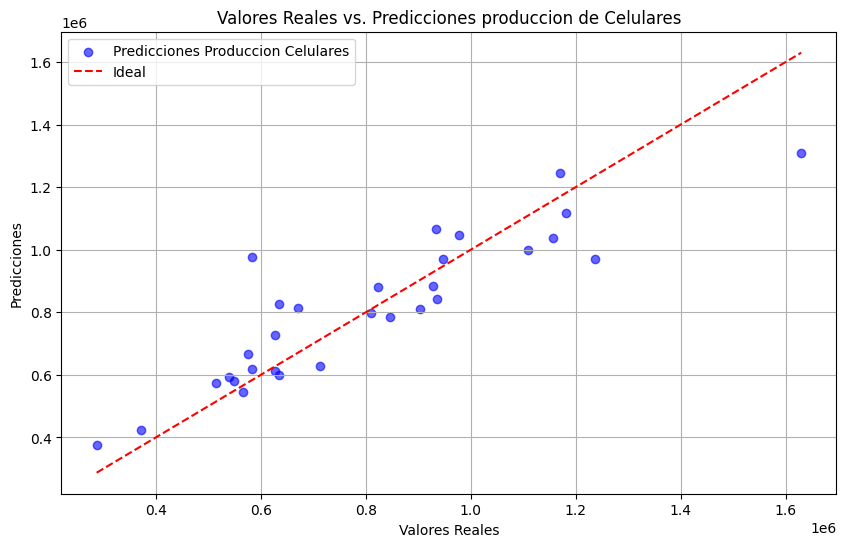

In [167]:
# Gráfico de dispersión de valores reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='blue', label='Predicciones Produccion Celulares')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones produccion de Celulares')
plt.legend()
plt.grid()
plt.show()

## Predicciones

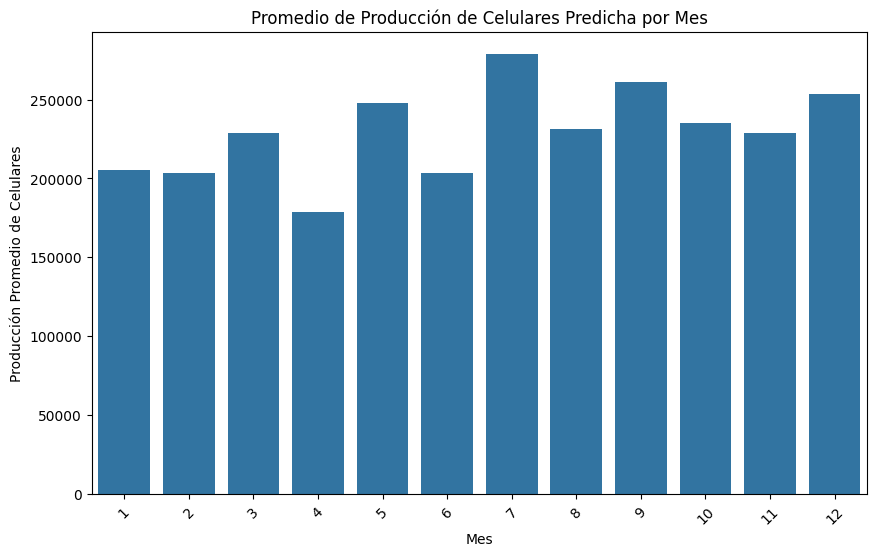

In [132]:
# Análisis de patrones estacionales
df_final['Predicciones'] = np.nan
df_final.iloc[-len(y_test):, df_final.columns.get_loc('Predicciones')] = y_pred_rf
seasonal_avg = df_final.groupby('Num_Mes')['Predicciones'].mean()

# Visualizar patrones estacionales
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values)
plt.title('Promedio de Producción de Celulares Predicha por Mes')
plt.xlabel('Mes')
plt.ylabel('Producción Promedio de Celulares')
plt.xticks(rotation=45)
plt.show()

# Modelo predictivo producción de Aires Microondas

### Modelo Regresión Lineal

In [191]:
# Defino características (X) y variable objetivo (y)
X = df_final[["AÑO",'Num_Mes', 'Cotizacion', 'Indice general']]
y = df_final['Microondas']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

R² Score: 0.10516547323809011
Mean Absolute Error (MAE): 11978.429999820672


### Modelo Random Forest

In [192]:
# Inicializar el modelo
rf_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2_rf}')
print(f'Mean Absolute Error (MAE): {mae_rf}')        # 0.604

R² Score: 0.6043149704076523
Mean Absolute Error (MAE): 11978.429999820672


In [171]:
# Crear nuevas variables
df_final['Sin_Num_Mes'] = np.sin(2 * np.pi * df_final['Num_Mes'] / 12)
df_final['Lag_1'] = df_final['Cotizacion'].shift(1)
df_final['Prom_trim_mwo'] = df_final['Microondas'].rolling(window=3).mean()

scaler = StandardScaler()
df_final[['Cotizacion']] = scaler.fit_transform(df_final[['Cotizacion']])
# Crear una columna de promedio trimestral
df_final['Trimestre'] = ((df_final['Num_Mes'] - 1) // 3) + 1
df_final['Promedio_Trimestral'] = df_final.groupby(['AÑO', 'Trimestre'])['Cotizacion'].transform('mean')

# Redefinir X e y
X = df_final[['AÑO', 'Num_Mes',"Indice general", "Cotizacion", "Sin_Num_Mes", "Lag_1", "Prom_trim_mwo"]]  # Solo columnas relevantes
y = df_final['Microondas']
df_final.corr()

,AÑO,Num_Mes,Indice general,Cotizacion,Aireacondicionado,Celulares,Microondas,Televisor,Mod Electr Autom,Sin_Num_Mes,Lag_1,Prom_trim_aa,Trimestre,Promedio_Trimestral,Prom_trim_cel,Prom_trim_mwo,Prom_trim_meAutom,Predicciones
AÑO,1.000000,-0.047529,0.566261,0.700371,-0.157011,-0.416314,-0.317641,-0.242560,-0.345523,0.040836,0.695247,-0.156637,-0.048896,0.704514,-0.484036,-0.356358,-0.389730,-0.122898
Num_Mes,-0.047529,1.000000,-0.029105,-0.014546,0.701434,0.164040,0.193898,0.145156,0.061731,-0.768474,-0.038697,0.574624,0.972043,-0.020734,0.258038,0.343615,0.138678,0.063844
Indice general,0.566261,-0.029105,1.000000,0.436936,-0.098331,-0.261291,-0.168281,-0.270199,-0.142465,0.054277,0.369608,-0.027425,-0.039644,0.407763,-0.186793,-0.134825,-0.149196,0.121072
Cotizacion,0.700371,-0.014546,0.436936,1.000000,-0.025857,-0.362638,-0.329466,-0.207966,0.240642,0.029601,0.992013,-0.003691,-0.021205,0.994120,-0.405615,-0.333782,0.253919,-0.121163
Aireacondicionado,-0.157011,0.701434,-0.098331,-0.025857,1.000000,0.444384,0.418425,0.303581,0.264895,-0.687089,-0.033668,0.839983,0.710637,-0.025504,0.496985,0.516272,0.313129,0.024068
Celulares,-0.416314,0.164040,-0.261291,-0.362638,0.444384,1.000000,0.622609,0.671220,0.310099,-0.175688,-0.352845,0.263330,0.149525,-0.354251,0.851203,0.567116,0.278597,-0.101872
Microondas,-0.317641,0.193898,-0.168281,-0.329466,0.418425,0.622609,1.000000,0.483072,0.244970,-0.243195,-0.324993,0.210280,0.181680,-0.321178,0.574765,0.850048,0.224722,-0.100484
Televisor,-0.242560,0.145156,-0.270199,-0.207966,0.303581,0.671220,0.483072,1.000000,0.225307,-0.137797,-0.199182,0.099796,0.137630,-0.201227,0.577309,0.434466,0.176521,-0.128939
Mod Electr Autom,-0.345523,0.061731,-0.142465,0.240642,0.264895,0.310099,0.244970,0.225307,1.000000,-0.096830,0.250227,0.171972,0.059156,0.246034,0.263492,0.223626,0.917750,-0.259338
Sin_Num_Mes,0.040836,-0.768474,0.054277,0.029601,-0.687089,-0.175688,-0.243195,-0.137797,-0.096830,1.000000,0.035441,-0.518659,-0.791996,0.023826,-0.259117,-0.375705,-0.147857,0.033183


In [172]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Inicializar el modelo
rf_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2_rf}')
print(f'Mean Absolute Error (MAE): {mae_rf}')         #  0.691

R² Score: 0.6913968491243512
Mean Absolute Error (MAE): 11978.429999820672


In [98]:
# Definir el modelo
rf_model = RandomForestRegressor(random_state=42)

# Definir el espacio de hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 150, 185, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]}

# Inicializar Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Mejores Hiperparámetros: {best_params}')

Mejores Hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


In [173]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Inicializar el modelo con los mejores parámetros
rf_model = RandomForestRegressor(n_estimators=70, max_depth=15, min_samples_split=4, min_samples_leaf= 1, random_state=42)
# Ajustar el modelo a los datos de entrenamiento
rf_model.fit(X_train, y_train)
# Hacer predicciones
y_pred_best = rf_model.predict(X_test)
# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
print(f'R² Score (Mejor Modelo): {best_r2}')            # 0.694 A SUPERAR
print(f'Mean Absolute Error (MAE): {mae}')

R² Score (Mejor Modelo): 0.7060766843905852
Mean Absolute Error (MAE): 7620.462566893426


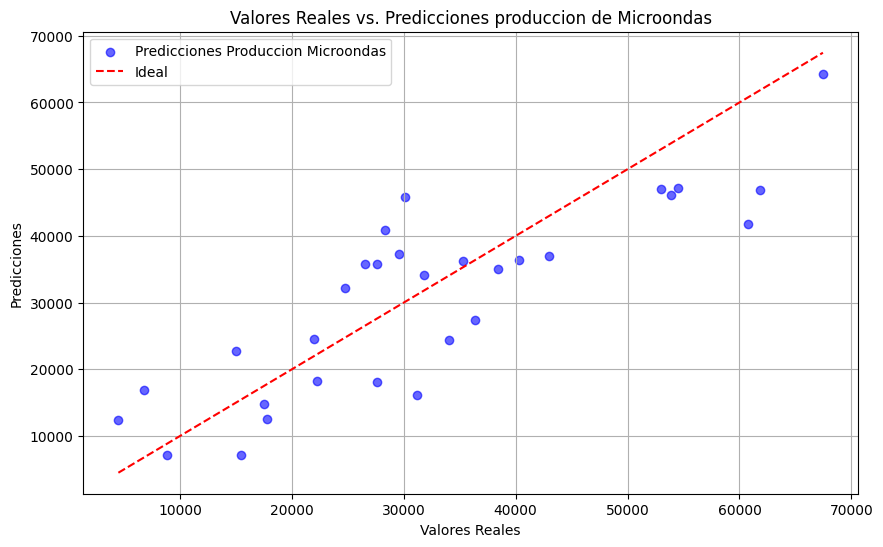

In [100]:
# Gráfico de dispersión de valores reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='blue', label='Predicciones Produccion Microondas')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones produccion de Microondas')
plt.legend()
plt.grid()
plt.show()

## Predicciones

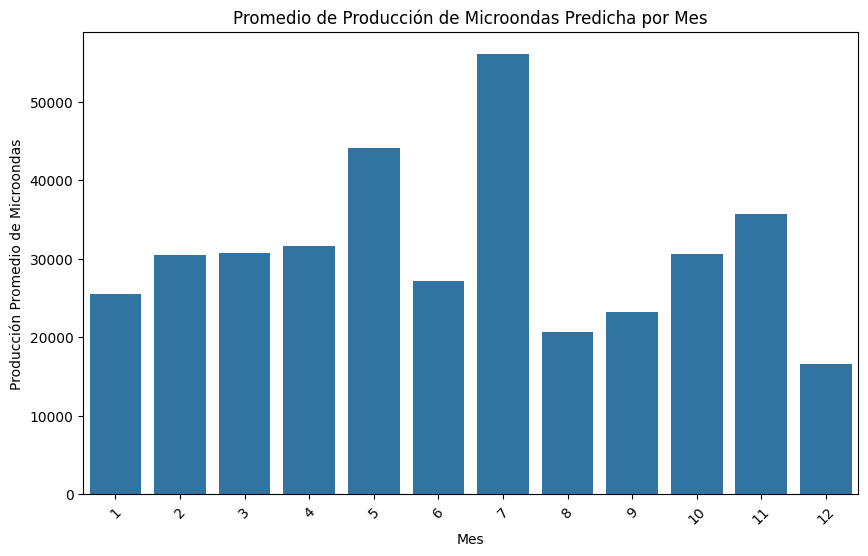

In [137]:
# Análisis de patrones estacionales
df_final['Predicciones'] = np.nan
df_final.iloc[-len(y_test):, df_final.columns.get_loc('Predicciones')] = y_pred_rf
seasonal_avg = df_final.groupby('Num_Mes')['Predicciones'].mean()

# Visualizar patrones estacionales
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values)
plt.title('Promedio de Producción de Microondas Predicha por Mes')
plt.xlabel('Mes')
plt.ylabel('Producción Promedio de Microondas')
plt.xticks(rotation=45)
plt.show()

# Modelo predictivo producción de Módulos Electrónicos para Automotor

### Modelo Regresión Lineal

In [193]:
# Defino características (X) y variable objetivo (y)
X = df_final[["AÑO",'Num_Mes', 'Cotizacion', 'Indice general']]
y = df_final['Mod Electr Autom']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

R² Score: 0.4089584332597693
Mean Absolute Error (MAE): 5954.734940927941


### Modelo Random Forest

In [194]:
# Inicializar el modelo
rf_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2_rf}')   # 0.62
print(f'Mean Absolute Error (MAE): {mae_rf}')           # 0.27

R² Score: 0.2748316122252531
Mean Absolute Error (MAE): 5954.734940927941


In [195]:
# Crear nuevas variables
df_final['Sin_Num_Mes'] = np.sin(2 * np.pi * df_final['Num_Mes'] / 12)
df_final['Lag_1'] = df_final['Cotizacion'].shift(1)
df_final['Prom_trim_meAutom'] = df_final['Mod Electr Autom'].rolling(window=3).mean()

scaler = StandardScaler()
df_final[['Cotizacion']] = scaler.fit_transform(df_final[['Cotizacion']])
# Crear una columna de promedio trimestral
df_final['Trimestre'] = ((df_final['Num_Mes'] - 1) // 3) + 1
df_final['Promedio_Trimestral'] = df_final.groupby(['AÑO', 'Trimestre'])['Cotizacion'].transform('mean')

# Redefinir X e y
X = df_final[[ "Num_Mes", "Cotizacion", "Prom_trim_meAutom"]]  # Solo columnas relevantes
y = df_final['Mod Electr Autom']

In [196]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Inicializar el modelo
rf_model = RandomForestRegressor(random_state=42)
# Entrenar el modelo
rf_model.fit(X_train, y_train)
# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)
# Evaluar el modelo
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2_rf}')   # 0.621
print(f'Mean Absolute Error (MAE): {mae_rf}')

R² Score: 0.6213215986291141
Mean Absolute Error (MAE): 5954.734940927941


In [105]:
# Definir el modelo
rf_model = RandomForestRegressor(random_state=42)

# Definir el espacio de hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 150, 185, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]}

# Inicializar Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Mejores Hiperparámetros: {best_params}')

Mejores Hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [197]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Inicializar el modelo con los mejores parámetros
rf_model = RandomForestRegressor(n_estimators=50, max_depth=8, min_samples_split=2, min_samples_leaf= 4, random_state=42)
# Ajustar el modelo a los datos de entrenamiento
rf_model.fit(X_train, y_train)
# Hacer predicciones
y_pred_best = rf_model.predict(X_test)
# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
print(f'R² Score (Mejor Modelo): {best_r2}') # 0.67
print(f'Mean Absolute Error (MAE): {mae}')

R² Score (Mejor Modelo): 0.6797642753610373
Mean Absolute Error (MAE): 4105.388090865453


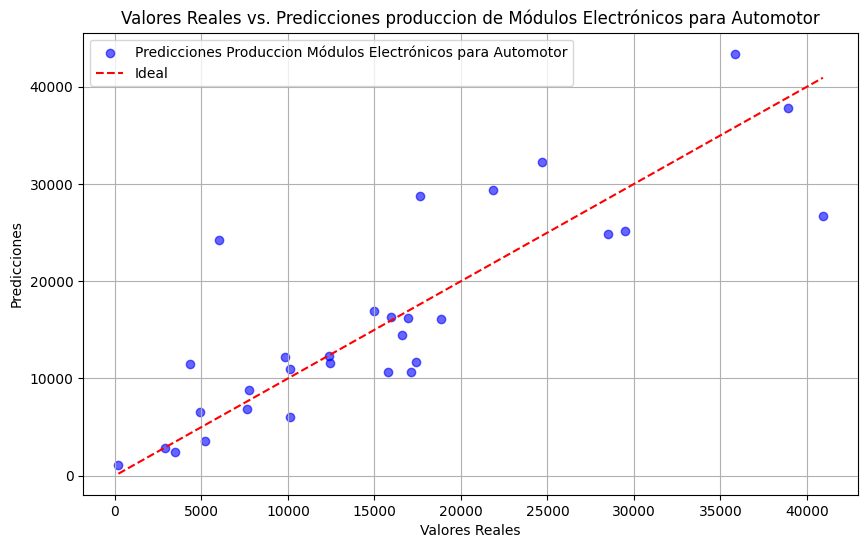

In [107]:
# Gráfico de dispersión de valores reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='blue', label='Predicciones Produccion Módulos Electrónicos para Automotor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones produccion de Módulos Electrónicos para Automotor')
plt.legend()
plt.grid()
plt.show()

## Predicciones

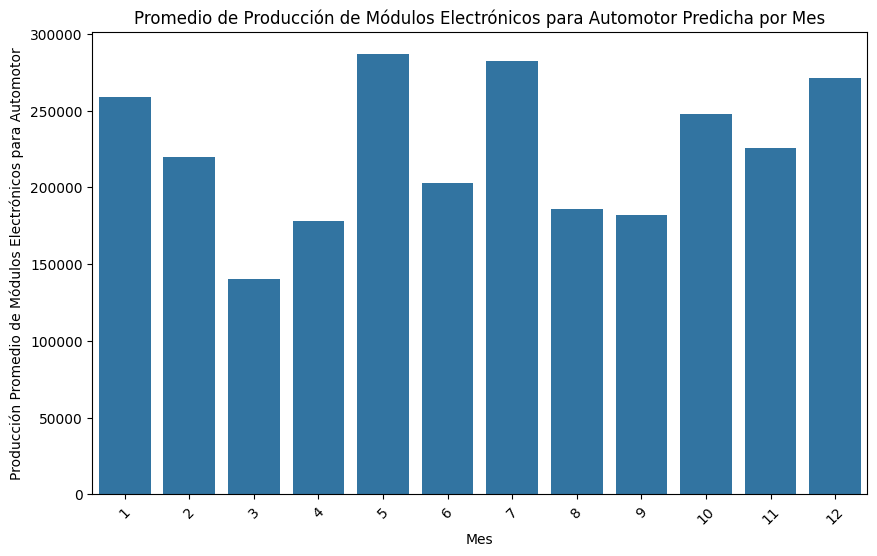

In [200]:
# Análisis de patrones estacionales
df_final['Predicciones'] = np.nan
df_final.iloc[-len(y_test):, df_final.columns.get_loc('Predicciones')] = y_pred_rf
seasonal_avg = df_final.groupby('Num_Mes')['Predicciones'].mean()

# Visualizar patrones estacionales
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values)
plt.title('Promedio de Producción de Módulos Electrónicos para Automotor Predicha por Mes')
plt.xlabel('Mes')
plt.ylabel('Producción Promedio de Módulos Electrónicos para Automotor')
plt.xticks(rotation=45)
plt.show()

# Modelo predictivo producción de Televisores   

In [108]:
file_name_mundial = "/content/drive/MyDrive/Colab Notebooks/Proyecto AprendAutom/mundiales.xlsx"
df_mundial = pd.read_excel(file_name_mundial)
df_mundial.rename(columns={'Año': 'AÑO'}, inplace=True)
df_mundial.rename(columns={'Mes': 'Num_Mes'}, inplace=True)
df_mundial
#eliminar las ultimas 2 filas
df_mundial = df_mundial.iloc[:-9]
df_mundial.dtypes
df_mundial


,AÑO,Num_Mes,Mundial
0,2014,1,0
1,2014,2,0
2,2014,3,0
3,2014,4,0
4,2014,5,0
...,...,...,...
130,2024,11,0
131,2024,12,0
132,2025,1,0
133,2025,2,0


In [109]:
print(df_final.columns)

Index(['AÑO', 'Num_Mes', 'Indice general', 'Cotizacion', 'Aireacondicionado',
       'Celulares', 'Microondas', 'Televisor', 'Mod Electr Autom',
       'Sin_Num_Mes', 'Lag_1', 'Prom_trim_aa', 'Trimestre',
       'Promedio_Trimestral', 'Prom_trim_cel', 'Prom_trim_mwo',
       'Prom_trim_meAutom'],
      dtype='object')


In [110]:
df_tv=pd.concat([df_final,df_mundial], axis=1)
df_tv

,AÑO,Num_Mes,Indice general,Cotizacion,Aireacondicionado,Celulares,Microondas,Televisor,Mod Electr Autom,Sin_Num_Mes,Lag_1,Prom_trim_aa,Trimestre,Promedio_Trimestral,Prom_trim_cel,Prom_trim_mwo,Prom_trim_meAutom,AÑO,Num_Mes,Mundial
0,2013,1,1.02,-0.539302,77671,609990,38094,136796,23797,5.000000e-01,NaN,NaN,1,-0.539063,NaN,NaN,NaN,2014.0,1.0,0.0
1,2013,2,1.06,-0.539087,90403,703500,32936,207715,26602,8.660254e-01,-0.539302,NaN,1,-0.539063,NaN,NaN,NaN,2014.0,2.0,0.0
2,2013,3,1.01,-0.538801,115115,918733,62302,288394,36371,1.000000e+00,-0.539087,94396.333333,1,-0.539063,7.440743e+05,44444.000000,28923.333333,2014.0,3.0,0.0
3,2013,4,0.96,-0.538586,78426,1083534,46865,268295,39229,8.660254e-01,-0.538801,94648.000000,2,-0.538228,9.019223e+05,47367.666667,34067.333333,2014.0,4.0,0.0
4,2013,5,1.26,-0.538228,108772,1293334,63549,320475,48379,5.000000e-01,-0.538586,100771.000000,2,-0.538228,1.098534e+06,57572.000000,41326.333333,2014.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2024,11,2.43,2.989923,198554,716903,18428,247424,37837,-5.000000e-01,2.920129,172834.000000,4,2.992310,6.048000e+05,23449.333333,34538.333333,NaN,NaN,NaN
143,2024,12,2.70,3.066876,216260,633913,17519,189205,17606,-2.449294e-16,2.989923,202199.000000,4,2.992310,5.986457e+05,18878.666667,29736.333333,NaN,NaN,NaN
144,2025,1,2.21,3.142039,102142,393358,16859,196924,28338,5.000000e-01,3.066876,172318.666667,1,3.178726,5.813913e+05,17602.000000,27927.000000,NaN,NaN,NaN
145,2025,2,2.40,3.180515,67686,557773,1140,230022,40067,8.660254e-01,3.142039,128696.000000,1,3.178726,5.283480e+05,11839.333333,28670.333333,NaN,NaN,NaN


In [111]:
# Asegúrate de que los nombres de las columnas coincidan
# Merge df_final and df_mundial on 'AÑO' and 'Num_Mes'
# Assuming df_mundial now correctly has 'AÑO', 'Num_Mes', and 'Mundial' columns
df_tv = df_final.merge(df_mundial[['AÑO', 'Num_Mes', 'Mundial']], on=['AÑO', 'Num_Mes'], how='left')

# Rellenar NaN en la columna 'Mundial'
df_tv['Mundial'].fillna(0, inplace=True)

# Display the final DataFrame info and head to check the merge result
print(df_tv.info())
print(df_tv)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AÑO                  147 non-null    int64  
 1   Num_Mes              147 non-null    int64  
 2   Indice general       147 non-null    float64
 3   Cotizacion           147 non-null    float64
 4   Aireacondicionado    147 non-null    int64  
 5   Celulares            147 non-null    int64  
 6   Microondas           147 non-null    int64  
 7   Televisor            147 non-null    int64  
 8   Mod Electr Autom     147 non-null    int64  
 9   Sin_Num_Mes          147 non-null    float64
 10  Lag_1                146 non-null    float64
 11  Prom_trim_aa         145 non-null    float64
 12  Trimestre            147 non-null    int64  
 13  Promedio_Trimestral  147 non-null    float64
 14  Prom_trim_cel        145 non-null    float64
 15  Prom_trim_mwo        145 non-null    flo

<ipython-input-111-1398219456>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tv['Mundial'].fillna(0, inplace=True)


In [112]:
# convertir la columna Mundial a numero entero
df_tv['Mundial'] = df_tv['Mundial'].astype(int)
df_tv

,AÑO,Num_Mes,Indice general,Cotizacion,Aireacondicionado,Celulares,Microondas,Televisor,Mod Electr Autom,Sin_Num_Mes,Lag_1,Prom_trim_aa,Trimestre,Promedio_Trimestral,Prom_trim_cel,Prom_trim_mwo,Prom_trim_meAutom,Mundial
0,2013,1,1.02,-0.539302,77671,609990,38094,136796,23797,5.000000e-01,NaN,NaN,1,-0.539063,NaN,NaN,NaN,0
1,2013,2,1.06,-0.539087,90403,703500,32936,207715,26602,8.660254e-01,-0.539302,NaN,1,-0.539063,NaN,NaN,NaN,0
2,2013,3,1.01,-0.538801,115115,918733,62302,288394,36371,1.000000e+00,-0.539087,94396.333333,1,-0.539063,7.440743e+05,44444.000000,28923.333333,0
3,2013,4,0.96,-0.538586,78426,1083534,46865,268295,39229,8.660254e-01,-0.538801,94648.000000,2,-0.538228,9.019223e+05,47367.666667,34067.333333,0
4,2013,5,1.26,-0.538228,108772,1293334,63549,320475,48379,5.000000e-01,-0.538586,100771.000000,2,-0.538228,1.098534e+06,57572.000000,41326.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2024,11,2.43,2.989923,198554,716903,18428,247424,37837,-5.000000e-01,2.920129,172834.000000,4,2.992310,6.048000e+05,23449.333333,34538.333333,0
143,2024,12,2.70,3.066876,216260,633913,17519,189205,17606,-2.449294e-16,2.989923,202199.000000,4,2.992310,5.986457e+05,18878.666667,29736.333333,0
144,2025,1,2.21,3.142039,102142,393358,16859,196924,28338,5.000000e-01,3.066876,172318.666667,1,3.178726,5.813913e+05,17602.000000,27927.000000,0
145,2025,2,2.40,3.180515,67686,557773,1140,230022,40067,8.660254e-01,3.142039,128696.000000,1,3.178726,5.283480e+05,11839.333333,28670.333333,0


### Modelo Regresión Lineal

In [198]:
# Defino características (X) y variable objetivo (y)
X = df_tv[["AÑO",'Num_Mes', 'Cotizacion', 'Indice general', "Mundial"]]
y = df_tv['Televisor']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

R² Score: 0.0797850468351976
Mean Absolute Error (MAE): 57103.03593358907


### Modelo Random Forest

In [199]:
# Inicializar el modelo
rf_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2_rf}')   # 0.349
print(f'Mean Absolute Error (MAE): {mae_rf}')

R² Score: 0.3490641038964525
Mean Absolute Error (MAE): 57103.03593358907


In [183]:
# Crear nuevas variables
df_tv['Sin_Num_Mes'] = np.sin(2 * np.pi * df_tv['Num_Mes'] / 12)
df_tv['Lag_1'] = df_tv['Cotizacion'].shift(1)
df_tv['Prom_trim_tv'] = df_tv['Televisor'].rolling(window=3).mean()

scaler = StandardScaler()
df_tv[['Cotizacion']] = scaler.fit_transform(df_tv[['Cotizacion']])
# Crear una columna de promedio trimestral
df_tv['Trimestre'] = ((df_tv['Num_Mes'] - 1) // 3) + 1
df_tv['Promedio_Trimestral'] = df_tv.groupby(['AÑO', 'Trimestre'])['Cotizacion'].transform('mean')

df_tv['Promedio_trim_Mund'] = df_tv['Mundial'].rolling(window=3).mean()
# Redefinir X e y
X = df_tv[[ "Num_Mes", "Cotizacion","Indice general", "Sin_Num_Mes", "Prom_trim_tv", "Mundial", "Promedio_trim_Mund"]]  # Solo columnas relevantes
y = df_tv['Televisor']


In [184]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Inicializar el modelo
rf_model = RandomForestRegressor(random_state=42)
# Entrenar el modelo
rf_model.fit(X_train, y_train)
# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)
# Evaluar el modelo
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2_rf}')
print(f'Mean Absolute Error (MAE): {mae_rf}')        # 0.713


R² Score: 0.7137490732849437
Mean Absolute Error (MAE): 57103.03593358907


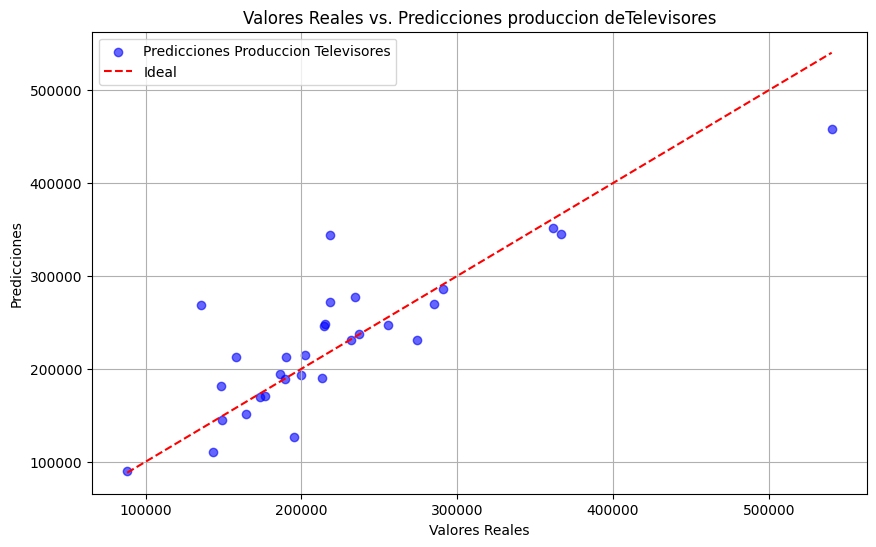

In [122]:
# Gráfico de dispersión de valores reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue', label='Predicciones Produccion Televisores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones produccion deTelevisores')
plt.legend()
plt.grid()
plt.show()

## Predicciones

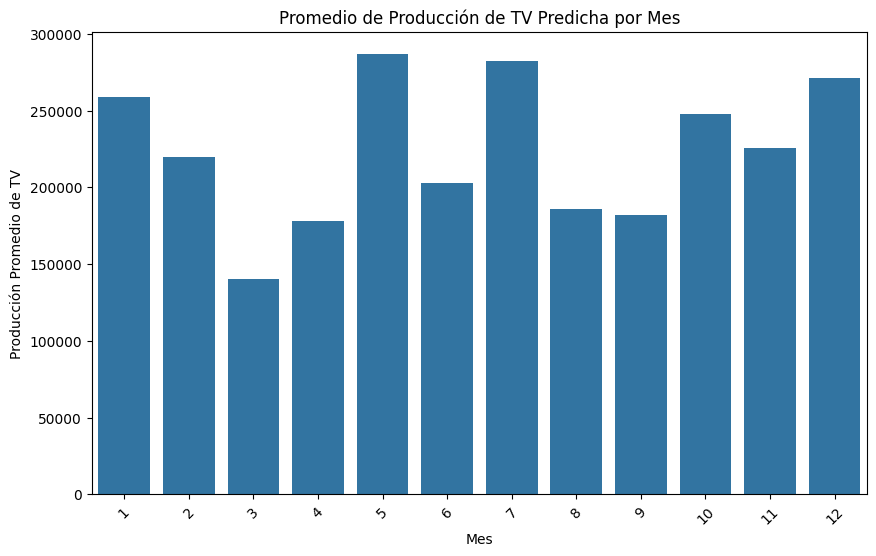

In [201]:
# Análisis de patrones estacionales
df_tv['Predicciones'] = np.nan
df_tv.iloc[-len(y_test):, df_tv.columns.get_loc('Predicciones')] = y_pred_rf

seasonal_avg = df_tv.groupby('Num_Mes')['Predicciones'].mean()

# Visualizar patrones estacionales
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values)
plt.title('Promedio de Producción de TV Predicha por Mes')
plt.xlabel('Mes')
plt.ylabel('Producción Promedio de TV')
plt.xticks(rotation=45)
plt.show()